# Initialization

In [2]:
%pip install gensim
%pip install numpy
%pip install scipy==1.12 #erreur avec les versions récentes de scipy qui ne comportent plus certaines fonctions appelées par gensim.models 
%pip install nltk
# %pip install PyChest
%pip install matplotlib
%pip install transformers scikit-learn torch


import gensim
# import PyChest
import math
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 26.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 9.8 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=24071654 sha256=facd700bb4210ea1adcca8d76d3bb24d46deea60e59bb741930233c9a2969bcb
  Stored in directory: /home/onyxia/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...


In [3]:
path_sentence = "test_text_stage.txt"

text = open(path_sentence,'r')

sentence=text.read()

text.close()
print(sentence)
def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    
    
    # Suppression de la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenisation
    words = word_tokenize(text)
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    print("ok")
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

#Exemple 
# texte = "This is an example of text preprocessing. It contains words and various sentences!"
mots_pretraites = preprocess_text(sentence)
print(mots_pretraites)


The process of photosynthesis is crucial to life on Earth. Plants, algae, and certain bacteria use this biochemical process to convert light energy into chemical energy stored in glucose molecules. Through photosynthesis, carbon dioxide is absorbed and oxygen is released, sustaining the oxygen levels necessary for aerobic respiration in animals. This intricate process involves two main stages: the light-dependent reactions occurring in the thylakoid membranes of chloroplasts, and the light-independent reactions (Calvin cycle) in the stroma. Understanding photosynthesis is fundamental not only to biology but also to our understanding of climate regulation and sustainable energy solutions. Artificial intelligence (AI) continues to revolutionize various industries, from healthcare to finance and beyond. AI algorithms, powered by machine learning and neural networks, analyze vast datasets to uncover patterns and make predictions. In healthcare, AI aids in diagnostics and personalized medic

In [7]:

mots_pretraites_filtres = [word for word in mots_pretraites if word in model.key_to_index]

vectors = np.array([model[word] for word in mots_pretraites_filtres])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)


# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(mots_pretraites_filtres)}

print(vectors_after_pca)


{'process': array([-0.14717123, -0.40288544], dtype=float32), 'photosynthesis': array([ 3.667272  , -0.03195592], dtype=float32), 'crucial': array([-0.44642955, -0.5049284 ], dtype=float32), 'life': array([-0.35822734, -0.10729476], dtype=float32), 'earth': array([0.23610994, 0.23340715], dtype=float32), 'plant': array([ 0.32071203, -0.16585201], dtype=float32), 'algae': array([ 1.7519307 , -0.02660962], dtype=float32), 'certain': array([-0.43349722, -0.13650984], dtype=float32), 'bacteria': array([ 1.935622  , -0.05084064], dtype=float32), 'use': array([-0.552099  , -0.05773153], dtype=float32), 'biochemical': array([ 1.3747604 , -0.03864223], dtype=float32), 'convert': array([-0.35914466, -0.13303143], dtype=float32), 'light': array([-0.08230945, -0.18695235], dtype=float32), 'energy': array([ 0.07522804, -0.35371035], dtype=float32), 'chemical': array([ 0.63179976, -0.04488463], dtype=float32), 'stored': array([0.13077308, 0.04078339], dtype=float32), 'glucose': array([1.6572509 , 0

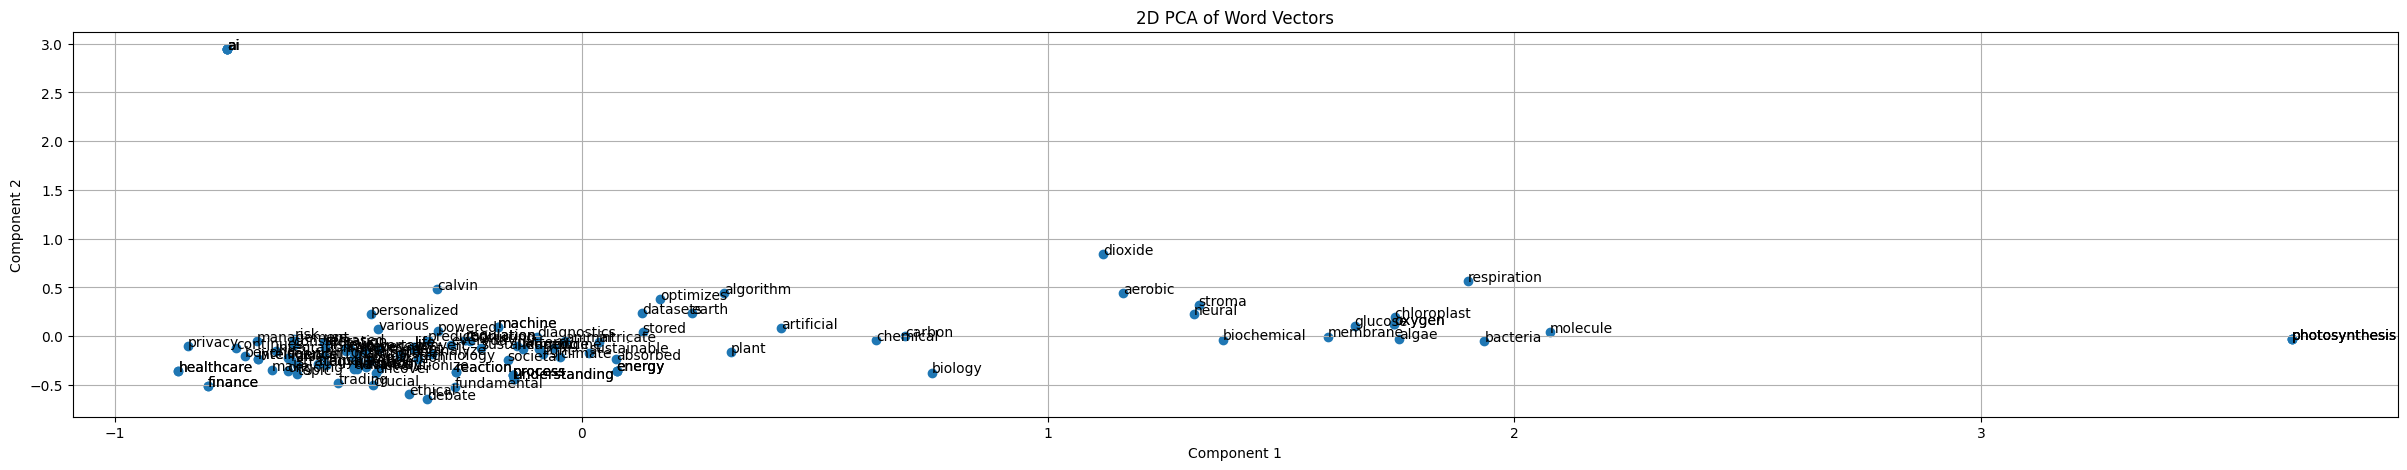

In [10]:

# Visualisation en 2D
plt.figure(figsize=(30, 5))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, word in enumerate(mots_pretraites_filtres):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()